In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [70]:
df = pd.read_csv("../data/texts/emotion_dataset_raw.csv")

# Data Exploration

In [73]:
df.head(7)

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...
5,fear,I'm expecting an extremely important phonecall...
6,sadness,.Couldnt wait to see them live. If missing th...


In [75]:
df.dtypes

Emotion    object
Text       object
dtype: object

In [77]:
#Taille du data frame
len(df)

34792

In [79]:
df.columns.tolist()

['Emotion', 'Text']

In [81]:
df['Emotion'].unique()

array(['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame',
       'disgust'], dtype=object)

In [83]:
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

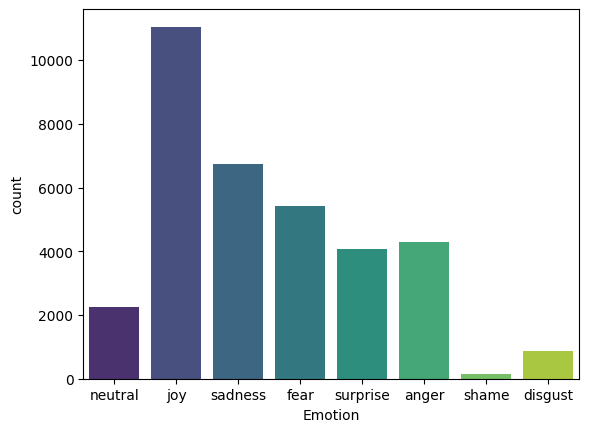

In [85]:
sns.countplot(x='Emotion', hue='Emotion', data=df, palette='viridis', legend=False)

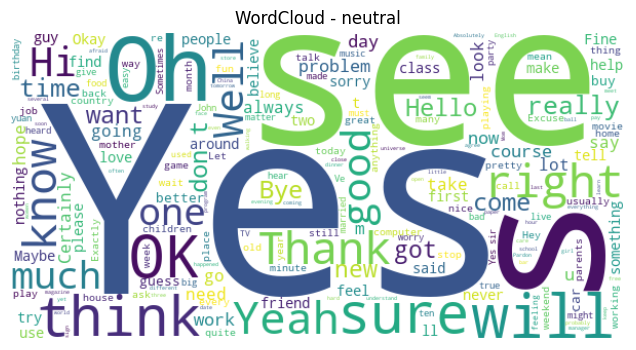

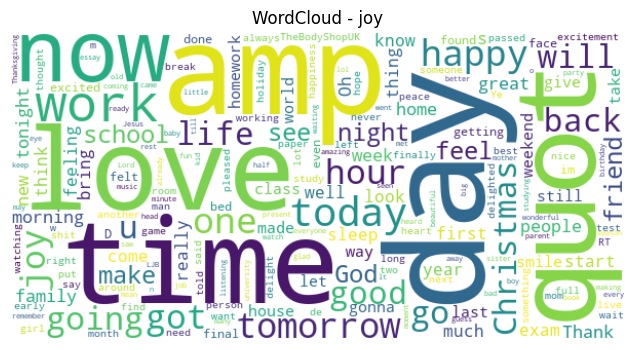

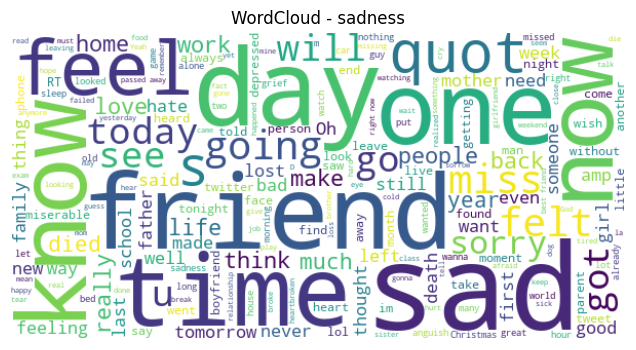

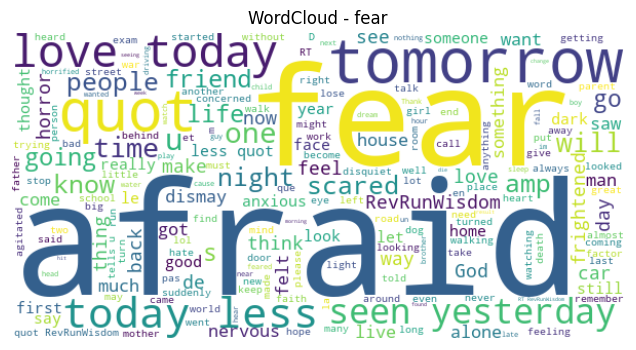

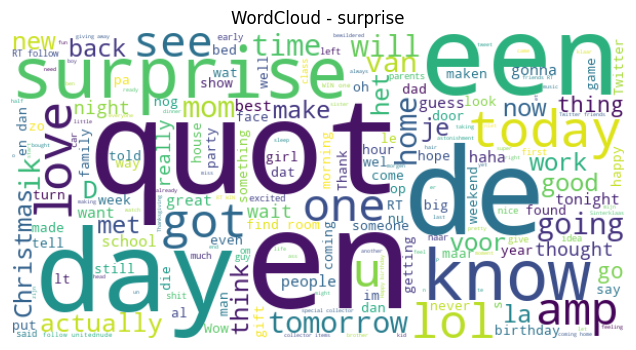

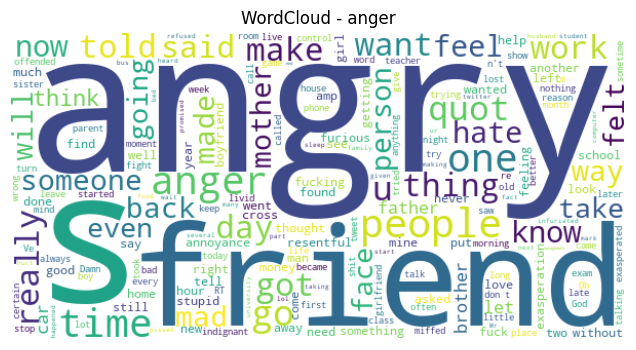

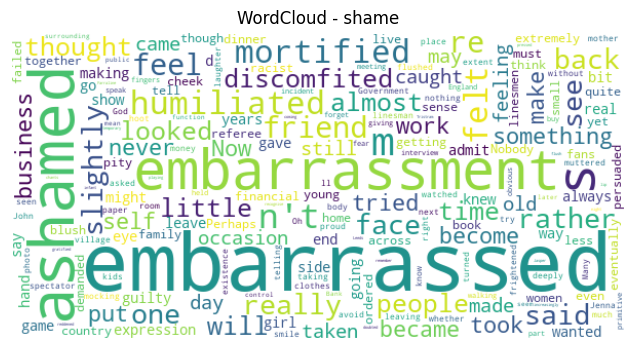

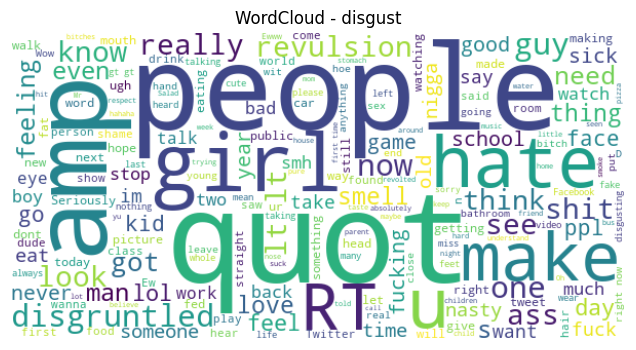

In [86]:
from wordcloud import WordCloud

emotions = df['Emotion'].unique()

for emo in emotions:
    text = ' '.join(df[df['Emotion'] == emo]['Text'])
    wc = WordCloud(width=600, height=300, background_color='white').generate(text)
    
    plt.figure(figsize=(8, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud - {emo}")
    plt.show()

In [109]:
seuil = 0.05 * len(df)
emotion_counts = df['Emotion'].value_counts()
classes_rares = emotion_counts[emotion_counts < seuil].index.tolist()
print("Classes sous-représentées :", classes_rares)

Classes sous-représentées : ['disgust', 'shame']


## Vérification de la représentativité de données:

### Qualité des textes

In [ ]:
#Champs manquants
df.isnull().sum()

In [ ]:
#Textes dupliqués
df['Text'].duplicated().sum()

### Diversité linguistique et thématique

In [92]:
df.sample(10)[['Emotion', 'Text']]

,Emotion,Text
17307,sadness,Wish we had a Computer Engineering class at sc...
13590,joy,Busy day of pub lunching and then a birthday p...
13245,sadness,Found my old keyboard pity its not my old drum...
18096,neutral,I hope so .
14293,fear,My friend and I planned to search for old docu...
6896,surprise,"Oh look, my whole family making fun of me on a..."
24128,joy,"Not all of it does this, love Coldplay I know ..."
21233,sadness,Oh I feel it !& the mall with my mom .. ..
6541,joy,The Buenos Aires flight was delayed and the pl...
28035,anger,"Bought an e-machine from a friend. Cheap, but..."


=> Les textes sont pas similaires et couvrent plusieurs sujets (famille, travail, santé...)

### Adéquation de données

In [63]:
exemples = df.sample(10, random_state=42)[['Emotion', 'Text']]
print(exemples.to_string(index=False))

Emotion                                                                                                          Text
sadness                                                   Cody won't be coming anywhere NEAR where I live. At all. );
  anger                                       Woah, not annoyed much!  #JustLikeBefore Some people just never change!
sadness                  ` Forgive me , Miss Kyte , " said the other lady softly , ` but you look quite downcast . " 
    joy                                                                        Great, got a biology ISA this morning 
  anger People don't even know how blessed u can be when you'ra a medical student -.- .. Nothing EVER goes smoothly  
    joy                                                             Two Classes. Orchestra. &amp; A Meeting For Work 
   fear                “@RevRunWisdom: not afraid of tomorrow, for I have seen yesterday and I love today #less” AMEN
neutral                                                 

### Biais éventuels

In [59]:
from langdetect import detect
from collections import Counter

# Appliquer la détection de langue sur un échantillon
sample = df['Text'].dropna().sample(200, random_state=42)
languages = [detect(text) for text in sample]

# Compter les langues détectées
lang_counts = Counter(languages)
print(lang_counts)

Counter({'en': 179, 'fr': 6, 'nl': 4, 'pt': 2, 'ca': 1, 'so': 1, 'ro': 1, 'af': 1, 'tl': 1, 'es': 1, 'cy': 1, 'id': 1, 'no': 1})


In [48]:
# Exemple de regroupement (à adapter à ton dataset)
emotion_sentiment = {
    'joy': 'positive',
    'love': 'positive',
    'anger': 'negative',
    'sadness': 'negative',
    'fear': 'negative',
    'surprise': 'neutral',
    'neutral': 'neutral'
}

# Ajouter une colonne sentiment
df['sentiment'] = df['Emotion'].map(emotion_sentiment)

# Analyse des proportions
print(df['sentiment'].value_counts(normalize=True) * 100)


sentiment
negative    48.620894
positive    32.687186
neutral     18.691921
Name: proportion, dtype: float64
